<h1>FCTM</h1>

<p><img alt="" src="https://www.nyu.edu/projects/yzhang/AlphaSpace/images/slide03.png" style="float:right; height:507px; width:1000px" /></p>

<p>This tutorial will introduce you to FCTM fragment centric topographical mapping of a single snapshot. For older version, click <a href="https://www.nyu.edu/projects/yzhang/AlphaSpace/" target="_blank">here</a>.</p>

<p>Please note several functionalities have been changed or deprecated in this version, If you are familiar with AlphaSpace 1.0, here you will see some reference to its tutorial, otherwise you can ignore them.</p>


# 1. Program requirements

Python, SciPy, NumPy, Mdtraj, Jupyter

These dependencies should be installed automatically when you install AlphaSpace.

To view how to install, please proceed to [README.md](../README.md)

Now AlphaSpace 2.0 no longer requires Naccess for ASA calculation, it is replaced by [Shrake and Rupley](http://mdtraj.org/1.7.2/examples/solvent-accessible-surface-area.html).

# 2. Load PDB File

AlphaSpace 2.0 can process multiple snapshots from a simulation, but for now let's start with a single snapshot. We will use the mdm2-p53 complex, same as 1.0 tutorial.

AlphaSpace can map a complete protein surface or can be restricted to map just the interface between a receptor protein and a binding partner. The "receptor"/"protein" part and the "binder"/"ligand" part can be automatically identified, or manually set.

First Import the modules, you should see them

In [1]:
import alphaspace as al
import mdtraj
import os
import matplotlib.pyplot as plt

In [2]:
# Load in receptor and ligand seperately using mdtraj. So you can load anything that is supported by mdtraj.
receptor = mdtraj.load("mdm2_p53/mdm2.pdb")
binder = mdtraj.load("mdm2_p53/p53.pdb")

In [3]:
# If you have the pdbqt file of the receptor, you can calculate the Vina Score. You can load the pdbqt file like this
al.annotateVinaAtomTypes(pdbqt="mdm2_p53/mdm2.pdbqt", receptor=receptor)

In [4]:
# Initialize a snapshot object, this will contain the receptor and the binder informations
ss = al.Snapshot()
ss.beta_cluster_dist = 1.6
ss.contact_cutoff = 1.6
ss.pocket_cluster_dist = 4.7
# Run the snapshot object by feeding it receptor and binder mdtraj objects.
ss.run(receptor=receptor, binder=binder)

Vina Atom Type found, calculating BScore


In [5]:
# You can use a simple for loop to iterate over all pockets found in the snapshot
for p in sorted(ss.pockets, key=lambda i: i.space, reverse=True):
    if p.isContact:
        print(
            "{} has alpha-space of {}, VinaScore of {:.1f} and is {:.0f}% occupied".format(p, round(p.space), p.score,
                                                                                          (p.occupancy * 100))
        )


Pocket 25 has alpha-space of 250.0, VinaScore of -5.8 and is 72% occupied
Pocket 23 has alpha-space of 241.0, VinaScore of -5.6 and is 94% occupied
Pocket 26 has alpha-space of 187.0, VinaScore of -5.7 and is 33% occupied
Pocket 43 has alpha-space of 70.0, VinaScore of -2.2 and is 51% occupied
Pocket 31 has alpha-space of 55.0, VinaScore of -1.5 and is 88% occupied
Pocket 42 has alpha-space of 44.0, VinaScore of -1.8 and is 71% occupied
Pocket 30 has alpha-space of 13.0, VinaScore of -0.8 and is 100% occupied


<p><img alt="" src="http://www.nyu.edu/projects/yzhang/AlphaSpace/images/table_mdm2_2.png" style="float:right; height:507px; width:1000px" /></p>

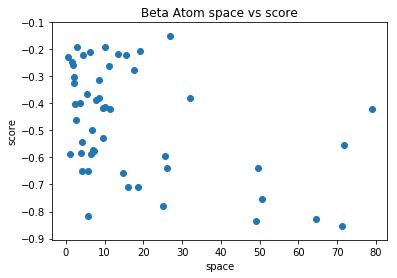

In [6]:
spaces = []
scores = []

for p in sorted(ss.pockets, key=lambda i: i.space, reverse=True):
    if p.isContact:
        for beta in p.betas:
            spaces.append(beta.space)
            scores.append(beta.score)
            
plt.scatter(x = spaces,y = scores)
plt.xlabel("space")
plt.ylabel("score")
plt.title('Beta Atom space vs score')
plt.show()